### Data Generation

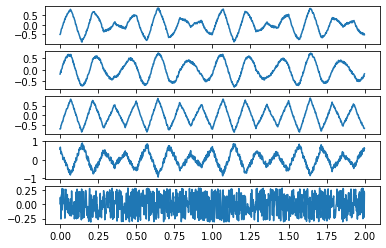

In [1]:
from re import T
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, subplot,plot,xlim,title,ylim,xlabel,ylabel
import matplotlib.pyplot as plt
from numpy import sin, pi
from scipy.signal import sawtooth
from sklearn.decomposition import PCA, FastICA

## initialize parameters
samplerate=500 # in Hz
N=1000 # data length

freq1=5 # in Hz
freq2=7 # in Hz
taxis=np.arange(N)/samplerate

PCnum=2  # the number of PC used to reconstruct signals

## generate test signals 
C1 = 0.75*sin(2*pi*freq1*taxis)        # 1st component: a sine wave
C2 = sawtooth(2*pi*freq2*taxis,0.5)    # 2nd component: a triangular wave

# Combine data in different proportions
X = np.zeros((5,N))

X[0,:] = 0.5*C1 + 0.5*C2 + 0.1*np.random.rand(1,N)
X[1,:] = 0.7*C1 + 0.2*C2 + 0.1*np.random.rand(1,N)
X[2,:] = 0.2*C1 + 0.7*C2 + 0.1*np.random.rand(1,N)
X[3,:] = -0.3*C1 - 0.6*C2 + 0.3*np.random.rand(1,N)
X[4,:] = 0.6*np.random.rand(1,N)    # Noise only

# Center data by subtracting mean
X = X - np.mean(X,1, keepdims=True)@np.ones((1,N))

figure()
for i in range(len(X)):
    subplot(len(X),1,i+1)
    plot(taxis,X[i,:])


### Principal Components Analysis 
using princomp funcion (using eig and svd)


Text(0, 0.5, 'percentage of accumulate eigenvalues')

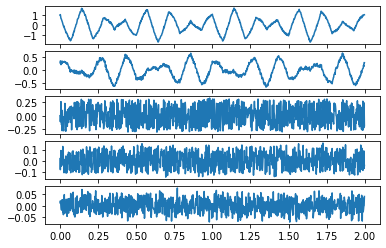

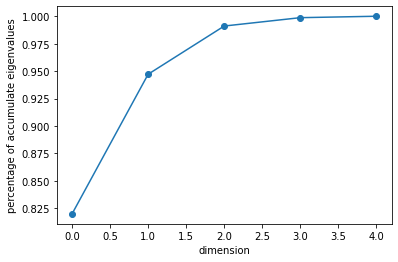

In [2]:
## Principal Components Analysis using princomp funcion (using eig and svd)
pca = PCA()


# Matlab: [U,PC,eigenVal]=pca(X)  #[COEFF, SCORE, LATENT]

PC = pca.fit_transform(X.T) # shape: n_features x n_components
U = pca.components_
eigenVal = pca.explained_variance_


figure()
for i in range(PC.shape[1]):
    subplot(PC.shape[1],1,i+1)
    plot(taxis,PC[:,i])

eigen_perc = pca.explained_variance_ratio_

eigen_perc = np.cumsum(eigen_perc)


figure()
plot(eigen_perc,'-o')
xlabel('dimension')
ylabel('percentage of accumulate eigenvalues')

    

In [3]:
## Check the covariance of principal components (PC)
print(np.round(np.cov(PC.T),5))  # make sure if the PCs are uncorrelated !
# the off-diagonal terms should be 0

[[ 0.54337  0.      -0.       0.      -0.     ]
 [ 0.       0.0843  -0.       0.      -0.     ]
 [-0.      -0.       0.02909 -0.       0.     ]
 [ 0.       0.      -0.       0.00505 -0.     ]
 [-0.      -0.       0.      -0.       0.00086]]


### Reconstruct the Signal
only use the first PCnum PCs

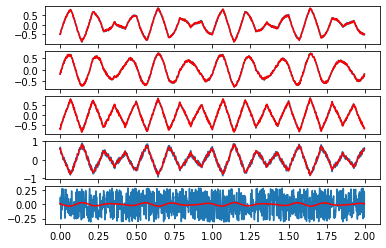

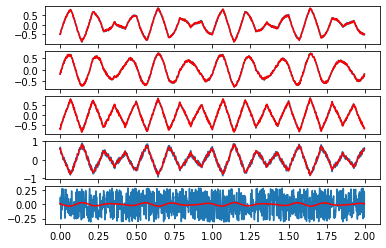

In [4]:
## Reconstruct the Signal only use the first PCnum PCs
newX = U[:PCnum,:].T @ PC[:,:PCnum].T

figure() 
for i in range(len(newX)):
    subplot(len(newX),1,i+1)
    plot(taxis,X[i,:])
    plot(taxis,newX[i,:],'r')

# automatic noise reduction using PCA
pca=PCA(n_components=2)
pca.fit(X.T)
x_reduction =pca.transform(X.T)
x_restore=pca.inverse_transform(x_reduction)

figure()

for i in range(len(x_restore.T)):
    subplot(len(x_restore.T),1,i+1)
    plot(taxis,X[i,:])
    plot(taxis,x_restore.T[i,:],'r')


plt.show()

### ICA analysis using FastICA

In [5]:
ICNo=3  # the specified number of independent components
PCNo=3  # the preserved number of PCs

In [6]:
## Independent Components Analysis using FastICA
transformer =FastICA(n_components=3)
icasig = transformer.fit_transform(X.T) # input shape = n_features * n_components

icasig = icasig.T
A = transformer.mixing_


C:\Users\Hongtao_z\miniconda3\envs\py38\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


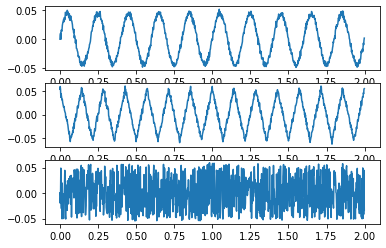

In [7]:
figure()
for i in range(len(icasig)):
    subplot(len(icasig),1,i+1),plot(taxis,icasig[i,:])

### Reconstruct the signal with the ICA singal

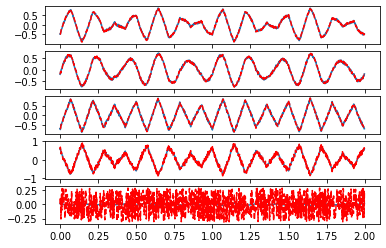

In [8]:
## reconstruct signal
newX = A[:,:2] @ icasig[:2,:]
# newX = transformer.inverse_transform(icasig.T).T
figure()
for i in range(len(newX)):
    subplot(len(newX), 1, i+1)
    plot(taxis, newX[i,:])
    plot(taxis, X[i,:],'r--')

plt.show()
